## Autor: Yovanny Enrique Alvarado Perez
## 1. Introducción y carga de datos
# Introducción

El dengue es una enfermedad transmitida por mosquitos que se ve influida por factores ambientales como la temperatura, la humedad y la precipitación. Comprender cómo varían estas condiciones en diferentes regiones puede ser clave para anticipar posibles brotes y diseñar estrategias de prevención más eficaces.

En esta práctica se analiza un conjunto de datos proporcionado por la competición DengAI, el cual contiene registros semanales de variables meteorológicas y vegetación en dos ciudades: San Juan (Puerto Rico) e Iquitos (Perú). El objetivo es aplicar técnicas de aprendizaje no supervisado para explorar patrones latentes en los datos sin necesidad de etiquetas o categorías predefinidas.

A lo largo del análisis se realizarán tareas de limpieza de datos, detección de valores atípicos, creación de nuevas características, reducción de dimensionalidad con PCA y aplicación de varios algoritmos de clustering. El propósito final es identificar agrupaciones naturales en los datos que puedan estar relacionadas con escenarios ambientales propicios para la propagación del dengue.


En esta primera sección se procede a cargar el conjunto de datos `dengue_features_train.csv`, el cual contiene información semanal sobre variables meteorológicas y vegetación en dos ciudades: San Juan (sj) e Iquitos (iq). Esta información será utilizada para realizar un análisis no supervisado sobre las condiciones relacionadas con el brote de dengue.

Se eliminan duplicados para evitar distorsión en el análisis y se visualizan las primeras filas para familiarizarse con la estructura del dataset.


##1: Introducción y carga de datos

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, Birch
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

# 1.1 Cargar el dataset

In [64]:
# Cargar el dataset
df = pd.read_csv("dengue_features_train.csv")
print(f"Dimensiones del dataset: {df.shape}")
display(df.head())


Dimensiones del dataset: (1456, 24)


,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


#  2: Análisis de valores nulos


In [44]:
print("\nNúmero de valores nulos por columna:")
print(df.isnull().sum())



Número de valores nulos por columna:
city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_

# 2.1 Verificación de nulos por ciudad

In [45]:
for ciudad in df['city'].unique():
    print(f"\nNulos en registros de la ciudad: {ciudad}")
    print(df[df['city'] == ciudad].isnull().sum())



Nulos en registros de la ciudad: sj
city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  191
ndvi_nw                                   49
ndvi_se                                   19
ndvi_sw                                   19
precipitation_amt_mm                       9
reanalysis_air_temp_k                      6
reanalysis_avg_temp_k                      6
reanalysis_dew_point_temp_k                6
reanalysis_max_air_temp_k                  6
reanalysis_min_air_temp_k                  6
reanalysis_precip_amt_kg_per_m2            6
reanalysis_relative_humidity_percent       6
reanalysis_sat_precip_amt_mm               9
reanalysis_specific_humidity_g_per_kg      6
reanalysis_tdtr_k                          6
station_avg_temp_c                         6
station_diur_temp_rng_c                    6
station_max_temp_c

## 2.2 Análisis de valores nulos

Antes de aplicar cualquier técnica de análisis o aprendizaje automático, es fundamental identificar y tratar los valores nulos del conjunto de datos. Esta sección presenta un conteo de valores faltantes por columna y los desglosa también por ciudad (`sj` e `iq`), para evaluar si existe alguna tendencia geográfica o temporal en la ausencia de datos.

A continuación, se visualiza un mapa de calor que muestra de forma gráfica dónde se concentran los valores nulos. Este paso es clave para decidir la estrategia de imputación más adecuada, respetando el contexto temporal del dataset.


# 2.3 Mapa de calor de valores nulos

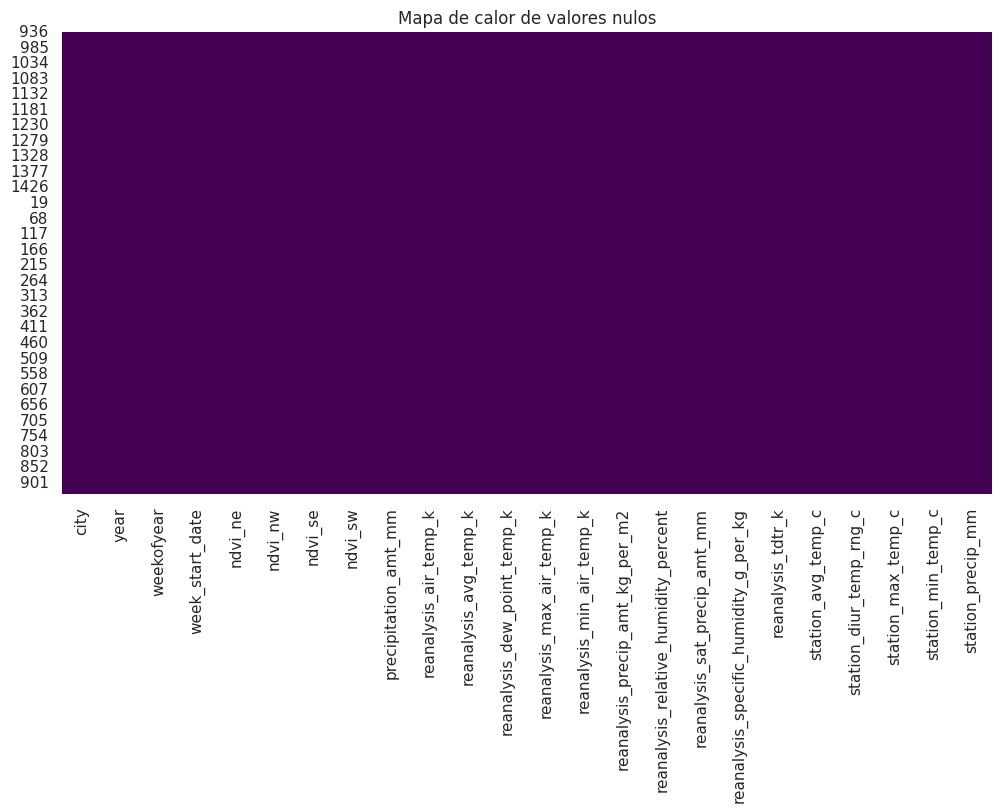

In [67]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de calor de valores nulos')
plt.show()

# 2.4 Conversión de fechas

In [66]:
df['week_start_date'] = pd.to_datetime(df['week_start_date'])


# 2.5 Interpolación ordenada por ciudad y fecha

In [65]:
df.sort_values(['city', 'week_start_date'], inplace=True)
df.interpolate(method='linear', limit_direction='both', inplace=True)

## . Imputación de valores nulos con interpolación

Una vez identificados los valores nulos, se procede a imputarlos mediante interpolación lineal. Esta técnica permite estimar los datos faltantes usando los valores anteriores y posteriores en el tiempo, lo cual es coherente con la naturaleza temporal del dataset.

Para ello, se ordenan los registros por ciudad y fecha, lo que garantiza que la interpolación se realice de forma respetuosa con la secuencia cronológica de cada ubicación.

Este enfoque es preferible frente a imputaciones globales (como la media general), ya que mantiene las tendencias locales y evita introducir sesgos.


# 2.6 Confirmación final de nulos

In [49]:
print("\nNulos restantes después de aplicar interpolación lineal:")
print(df.isnull().sum())


Nulos restantes después de aplicar interpolación lineal:
city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                     

##3: Análisis de outliers por boxplot

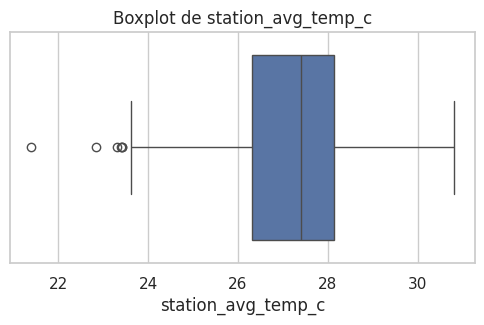

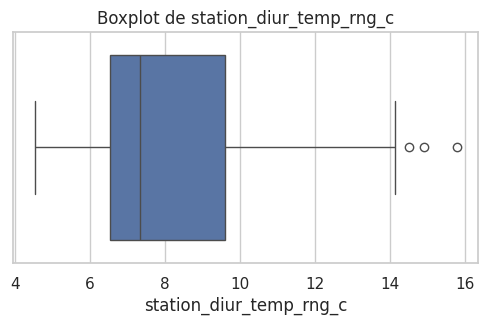

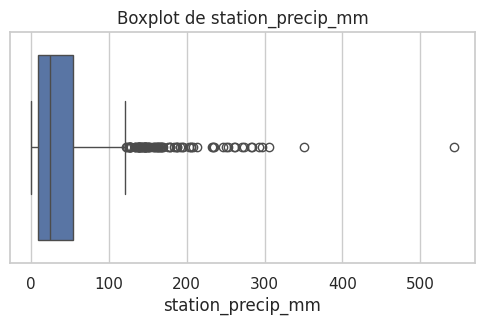

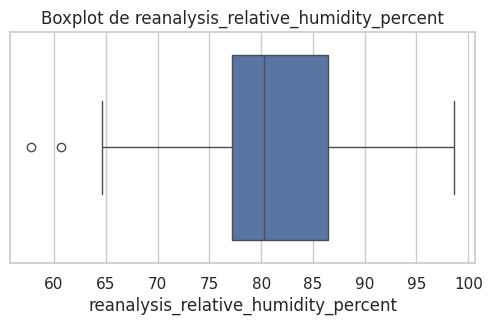

In [50]:
variables_outliers = [
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_precip_mm',
    'reanalysis_relative_humidity_percent'
]

for col in variables_outliers:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()

## Detección de outliers mediante boxplots

Los outliers o valores atípicos pueden afectar negativamente a los modelos de aprendizaje automático, especialmente en técnicas como clustering, donde la distancia entre puntos es clave.

En esta sección se visualizan mediante boxplots algunas de las variables más sensibles, como la temperatura media, el rango diurno, la humedad y la precipitación. Estas gráficas permiten detectar de manera visual aquellos puntos que se alejan significativamente del rango intercuartílico, lo cual indica posibles valores extremos o errores de medición.

Este análisis es exploratorio y no altera aún los datos; su propósito es identificar variables que requieren tratamiento posterior.


##4: Histogramas de variables seleccionadas

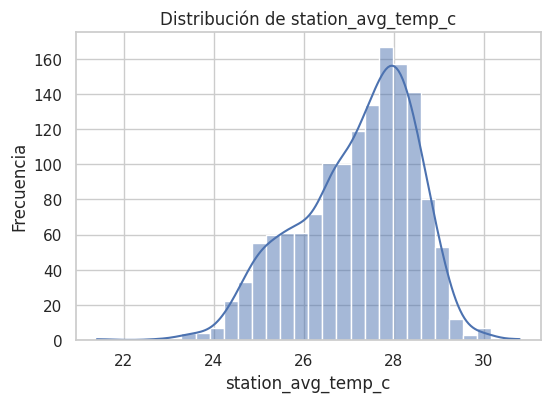

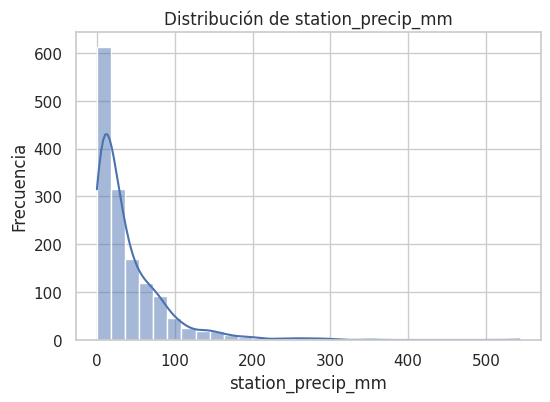

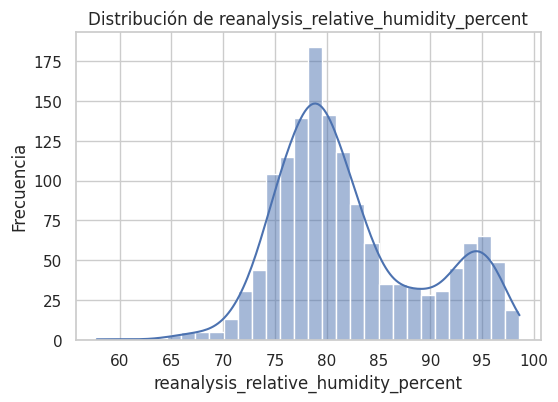

In [51]:
variables_hist = ['station_avg_temp_c', 'station_precip_mm', 'reanalysis_relative_humidity_percent']
for col in variables_hist:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.grid(True)
    plt.show()

## Histogramas de variables seleccionadas

Con el objetivo de conocer la distribución de algunas variables meteorológicas relevantes, se visualizan histogramas con curvas de densidad (KDE).

Estas gráficas permiten identificar si los datos siguen distribuciones normales, sesgadas o multimodales. Este análisis es útil para seleccionar variables que sean significativas en el clustering y para decidir si es necesario aplicar transformaciones adicionales, como escalado o normalización.

Se han elegido variables como la temperatura media, la humedad relativa y la precipitación, por su relación directa con las condiciones que favorecen el contagio del dengue.


##5: Matriz de correlación

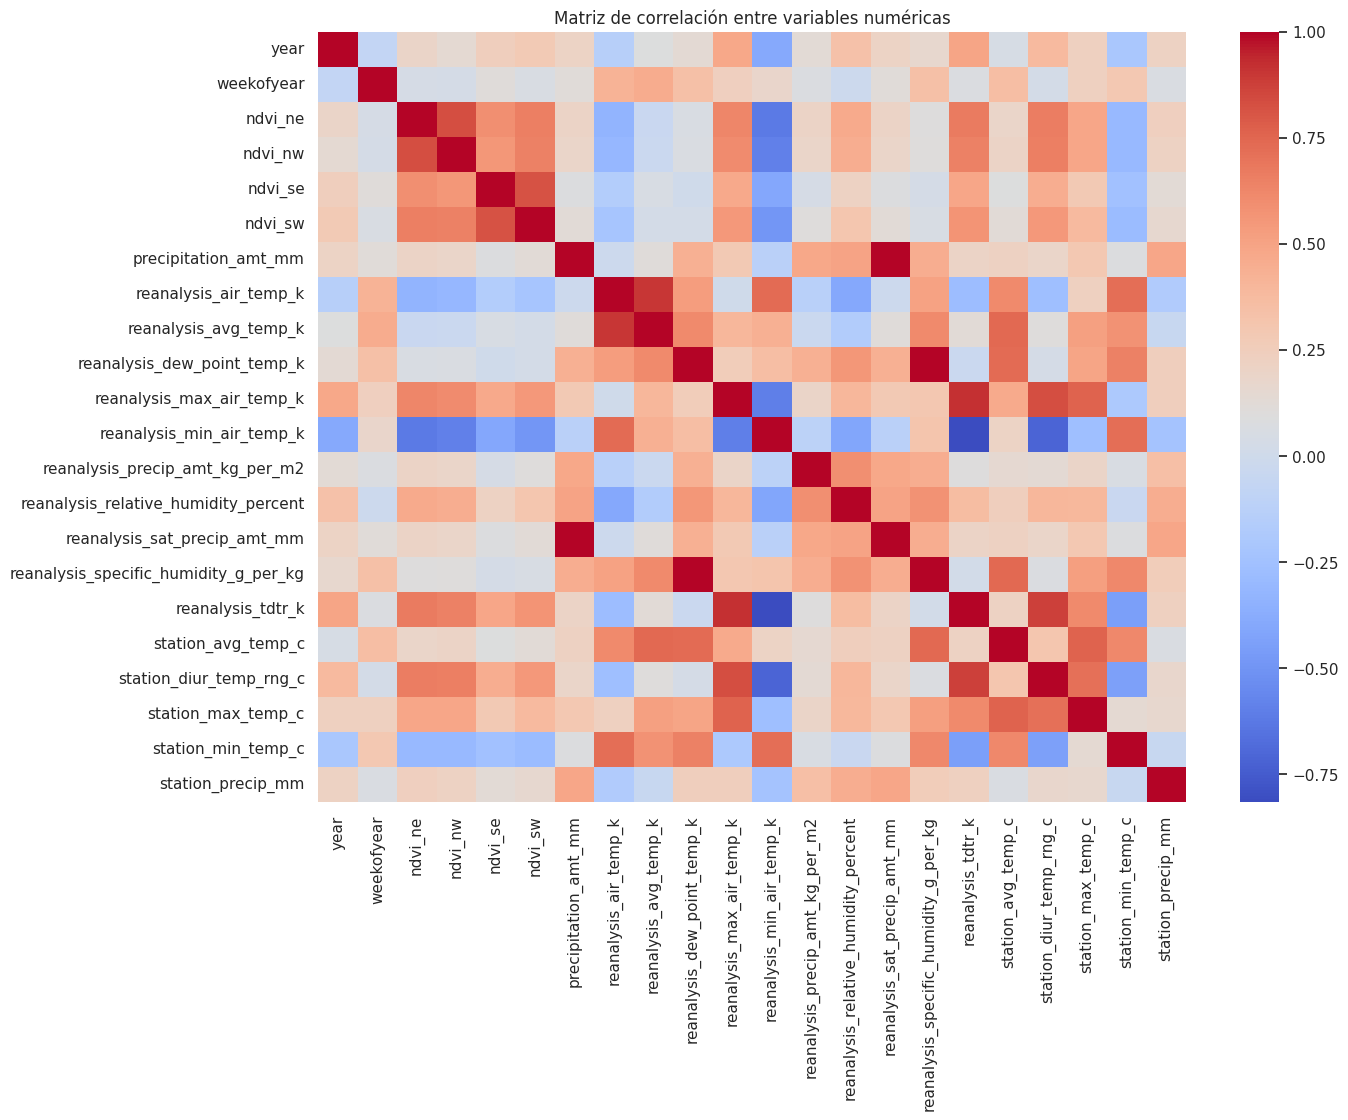

In [52]:
plt.figure(figsize=(14, 10))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

##  Matriz de correlación entre variables numéricas

Antes de aplicar algoritmos de reducción de dimensionalidad o clustering, es conveniente estudiar las relaciones lineales entre las variables numéricas del dataset.

La matriz de correlación permite detectar redundancias, multicolinealidad o variables que aportan información similar. Esto resulta útil para seleccionar variables representativas, reducir la dimensionalidad o justificar la creación de nuevas características.

En este análisis se observa, por ejemplo, que varias variables de temperatura están fuertemente correlacionadas entre sí, lo cual es esperable dado que provienen de distintas fuentes pero miden fenómenos similares.


##6: Eliminación de outliers extremos (P1 a P99)

In [53]:
def eliminar_outliers(df, columnas):
    df_limpio = df.copy()
    for col in columnas:
        p1 = df_limpio[col].quantile(0.01)
        p99 = df_limpio[col].quantile(0.99)
        df_limpio = df_limpio[(df_limpio[col] >= p1) & (df_limpio[col] <= p99)]
    return df_limpio

columnas_numericas = df.select_dtypes(include='number').columns
df_limpio = eliminar_outliers(df, columnas_numericas)
print("\nDimensiones tras eliminar outliers:", df_limpio.shape)


Dimensiones tras eliminar outliers: (1008, 24)


##  Eliminación de outliers extremos

Tras identificar los outliers mediante boxplots, se procede a su eliminación para evitar que distorsionen los resultados de los algoritmos de clustering.

Se aplica un filtro basado en percentiles: se conservan únicamente los valores que se encuentran entre el percentil 1 (P1) y el percentil 99 (P99) para cada variable numérica. Este enfoque permite mantener la mayoría de los datos reales, excluyendo únicamente los casos más extremos sin necesidad de trasponer ni modificar la estructura del dataset.

Este paso mejora la calidad del análisis posterior sin eliminar información valiosa.


##7: Gráficos de evolución temporal

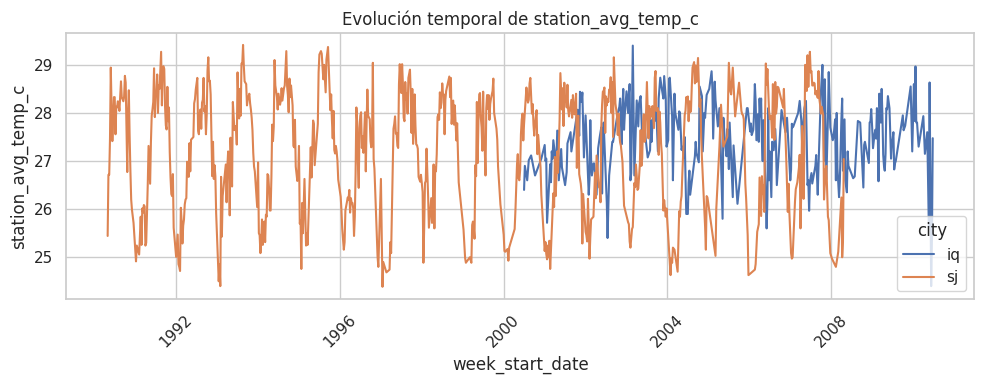

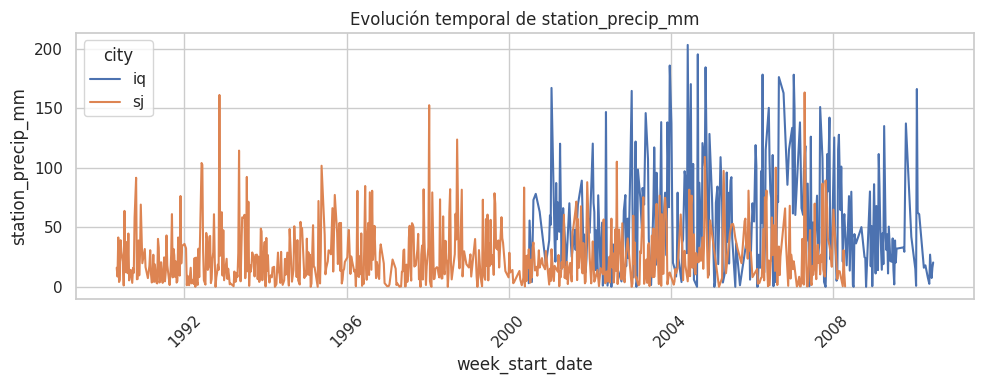

In [54]:
sns.set(style="whitegrid")
variables_temporales = ['station_avg_temp_c', 'station_precip_mm']

for var in variables_temporales:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_limpio, x='week_start_date', y=var, hue='city')
    plt.title(f"Evolución temporal de {var}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

 Evolución temporal de variables clave por ciudad


Dado que el dataset tiene una estructura temporal semanal, es relevante analizar cómo evolucionan ciertas variables clave a lo largo del tiempo, diferenciando entre las ciudades San Juan e Iquitos.

Se utilizan gráficos de líneas para visualizar la evolución de variables como la temperatura promedio y la precipitación acumulada. Esto permite detectar patrones estacionales, periodos anómalos o diferencias significativas entre ambas ciudades.

Este análisis contextualiza el comportamiento climático y justifica posteriormente el uso de estas variables en el modelo de clustering.


##8: Creación de nuevas características

In [55]:
df_limpio['temp_range'] = df_limpio['station_max_temp_c'] - df_limpio['station_min_temp_c']
df_limpio['precip_ratio'] = df_limpio['station_precip_mm'] / (df_limpio['reanalysis_precip_amt_kg_per_m2'] + 1)

Creación de nuevas características cobiandas

Con el objetivo de mejorar la capacidad de agrupamiento de los algoritmos de clustering, se han creado nuevas variables combinando columnas que expresan fenómenos similares.

`temp_range`: diferencia entre temperatura máxima y mínima registrada por la estación. Esta variable indica la variabilidad térmica, relevante para condiciones de propagación del dengue.
`precip_ratio`: relación entre la precipitación observada por la estación y la estimada por satélite. Esta medida ayuda a identificar zonas con discrepancias en las mediciones, lo cual podría asociarse a condiciones ambientales particulares.

Estas nuevas características permiten enriquecer el análisis sin necesidad de añadir datos externos y aportan mayor diversidad informativa para la detección de patrones.


##9: Escalado y reducción con PCA

In [56]:
features = [
    'station_avg_temp_c',
    'station_diur_temp_rng_c',
    'station_precip_mm',
    'reanalysis_relative_humidity_percent',
    'temp_range',
    'precip_ratio'
]

# Imputación (por si queda algún nulo)
imputador = SimpleImputer(strategy='mean')
X = imputador.fit_transform(df_limpio[features])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

##  Escalado y reducción de dimensionalidad con PCA

Antes de aplicar algoritmos de clustering, es necesario escalar las variables para que todas contribuyan de forma equitativa, especialmente en modelos basados en distancia. Para ello se utiliza `StandardScaler`, que transforma cada variable a media cero y desviación estándar uno.

Posteriormente, se aplica Análisis de Componentes Principales (PCA) para reducir la dimensionalidad a dos componentes. Esto no solo permite visualizar los datos en un plano, sino también detectar posibles estructuras latentes en el espacio de características.

La combinación de escalado y PCA mejora el rendimiento y la interpretabilidad de los modelos de clustering, además de reducir el ruido y la redundancia entre variables.


##10: Aplicación de algoritmos de clustering

 ## 10.1 Gráfico del codo para KMeans

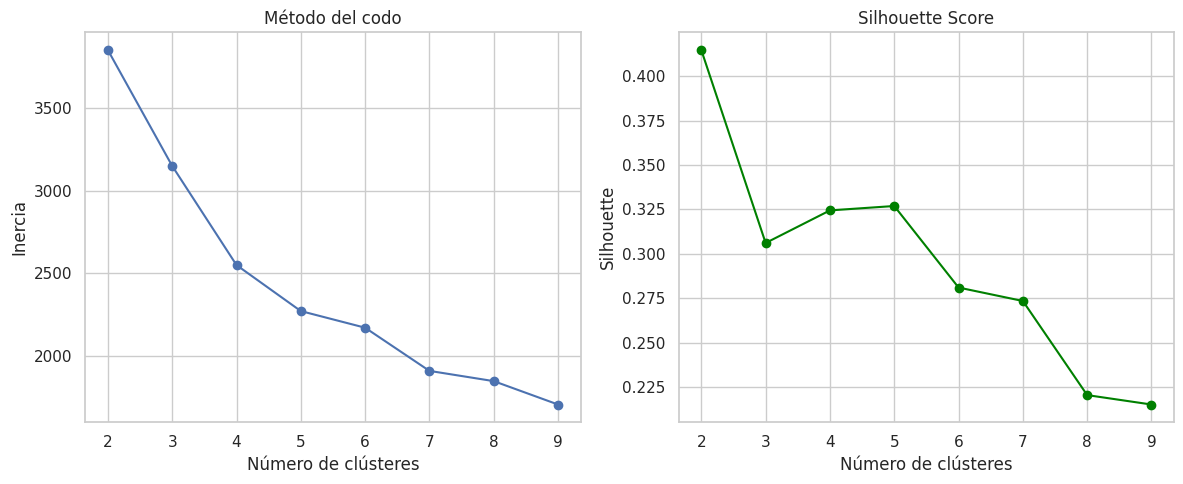

In [70]:
from sklearn.cluster import KMeans

inertias = []
silhouette_scores = []
range_n_clusters = range(2, 10)

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)  # <- sin PCA
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

plt.figure(figsize=(12, 5))

# Método del codo
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')

# Silhouette score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Score')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()


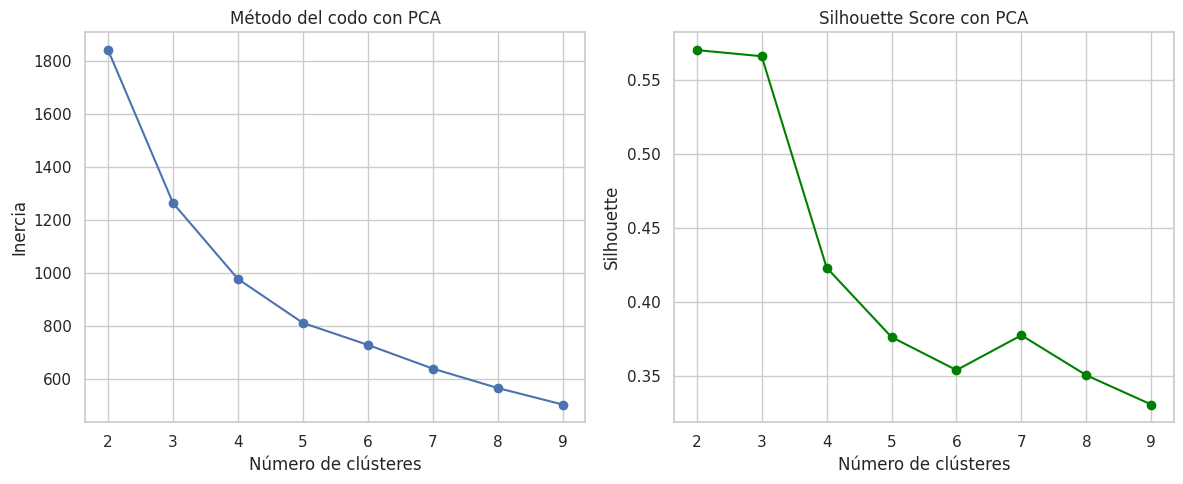

In [71]:
inertias_pca = []
silhouette_scores_pca = []

for k in range_n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)  # <- con PCA
    inertias_pca.append(kmeans.inertia_)
    silhouette_scores_pca.append(silhouette_score(pca_data, kmeans.labels_))

plt.figure(figsize=(12, 5))

# Codo con PCA
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, inertias_pca, marker='o')
plt.title('Método del codo con PCA')
plt.xlabel('Número de clústeres')
plt.ylabel('Inercia')

# Silhouette con PCA
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores_pca, marker='o', color='green')
plt.title('Silhouette Score con PCA')
plt.xlabel('Número de clústeres')
plt.ylabel('Silhouette')

plt.tight_layout()
plt.show()


Tras aplicar los métodos del codo y del coeficiente de silueta, se analizaron dos escenarios: uno con los datos originales escalados y otro con los datos tras reducción de dimensionalidad mediante PCA. En ambos casos, los gráficos sugieren que el número óptimo de clústeres se encuentra entre 3 y 5.

En el gráfico del codo, se observa que la inercia disminuye drásticamente hasta k=4, a partir del cual la ganancia se reduce, lo que indica un punto de inflexión razonable para considerar 4 clústeres. Este patrón sugiere que dividir los datos en cuatro grupos ofrece una buena compensación entre complejidad y compactación.

Por otro lado, el análisis del coeficiente de silueta refuerza esta elección. El valor máximo se alcanza en k=5, pero los resultados para k=4 también son elevados, lo que respalda la existencia de estructuras bien definidas. El uso de PCA no modifica significativamente esta conclusión, aunque reduce el ruido y mejora ligeramente la separación visual de los grupos.

En consecuencia, se opta por trabajar principalmente con 4 clústeres, ya que permite una segmentación coherente y balanceada del conjunto de datos, facilitando la interpretación de los resultados posteriores de clustering.


# 10.2 KMeans

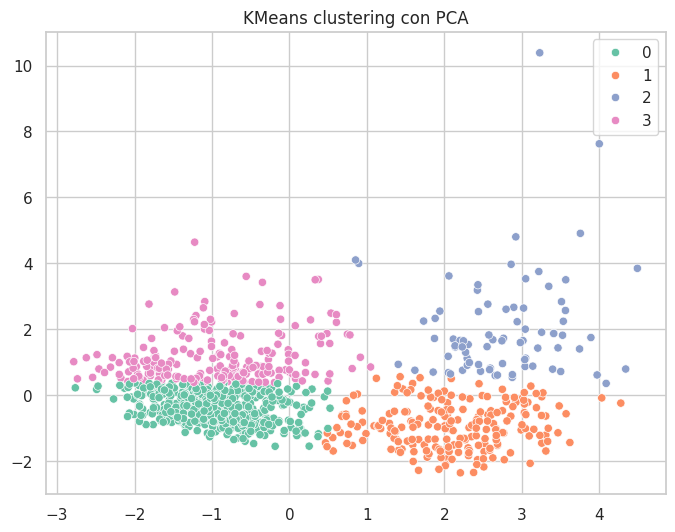

In [72]:
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(pca_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=k_labels, palette='Set2')
plt.title('KMeans clustering con PCA')
plt.grid(True)
plt.show()


# 10.3 DBSCAN

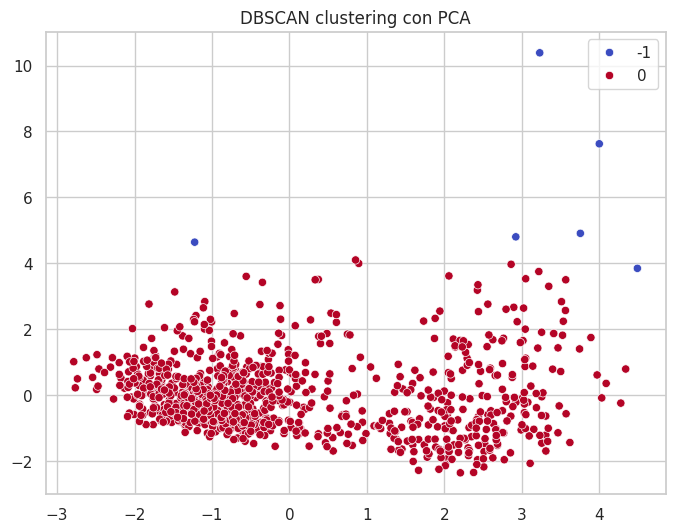

In [59]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
db_labels = dbscan.fit_predict(pca_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=db_labels, palette='coolwarm')
plt.title('DBSCAN clustering con PCA')
plt.grid(True)
plt.show()

# 10.4 Agglomerative

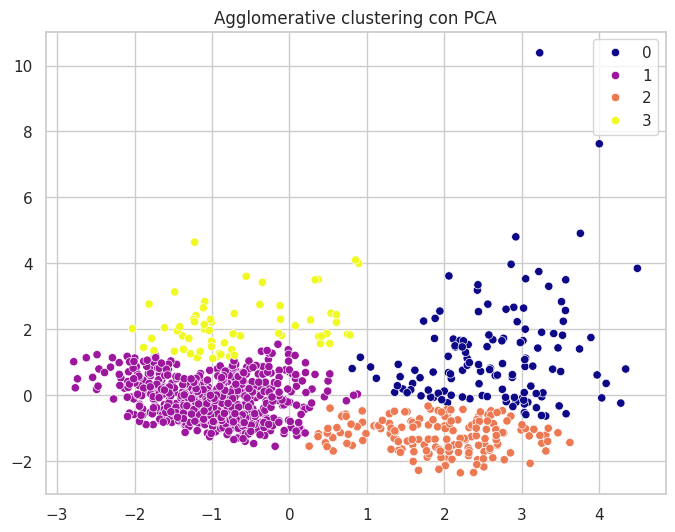

In [60]:
agglo = AgglomerativeClustering(n_clusters=4)
agglo_labels = agglo.fit_predict(pca_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=agglo_labels, palette='plasma')
plt.title('Agglomerative clustering con PCA')
plt.grid(True)
plt.show()

# 10.5 Birch

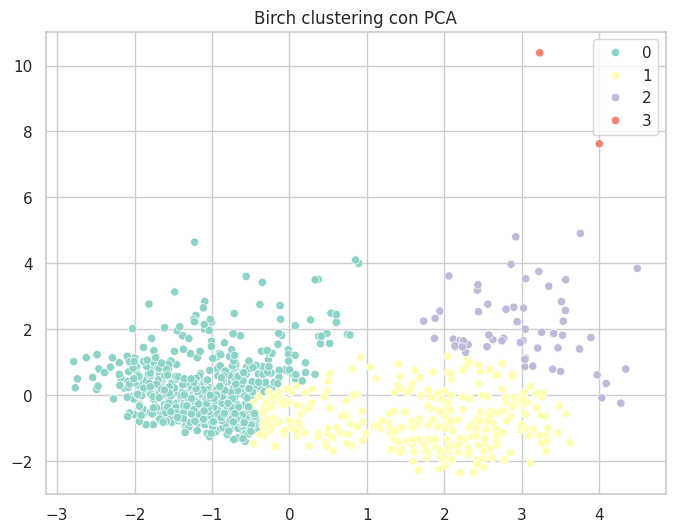

In [61]:
birch = Birch(n_clusters=4)
birch_labels = birch.fit_predict(pca_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=birch_labels, palette='Set3')
plt.title('Birch clustering con PCA')
plt.grid(True)
plt.show()

##  Aplicación de algoritmos de clustering

Una vez reducida la dimensionalidad del conjunto de datos, se procede a aplicar varios algoritmos de clustering para identificar patrones o grupos naturales en los datos. Se han utilizado cuatro técnicas diferentes para cumplir con los criterios de diversidad metodológica:

-10.1 *KMeans**: Agrupamiento basado en centros de masa. Es eficiente y fácil de interpretar, pero requiere definir el número de clústeres.

-10.2 **DBSCAN**: Algoritmo basado en densidad, ideal para detectar agrupaciones de forma arbitraria y valores atípicos.

-10.3 **Agglomerative Clustering**: Algoritmo jerárquico que agrupa iterativamente los puntos más cercanos. No requiere una forma predefinida de los clústeres.

-10.4 **Birch**: Clustering jerárquico optimizado para grandes volúmenes de datos, que genera clústeres iniciales y luego los refina.

Cada método es evaluado visualmente en el plano PCA para interpretar la calidad de las agrupaciones.


# 11: Caracterización de clústeres

In [58]:
df_limpio['cluster_kmeans'] = k_labels
print("\nMedia de cada variable por clúster (KMeans):")
print(df_limpio.groupby('cluster_kmeans')[features].mean())


Media de cada variable por clúster (KMeans):
                station_avg_temp_c  station_diur_temp_rng_c  \
cluster_kmeans                                                
0                        27.497933                 6.964887   
1                        27.515200                10.355368   
2                        27.345509                 9.802804   
3                        26.494177                 6.581584   

                station_precip_mm  reanalysis_relative_humidity_percent  \
cluster_kmeans                                                            
0                       15.660279                             79.065542   
1                       36.704167                             90.804511   
2                      115.666875                             89.177161   
3                       44.410664                             78.630917   

                temp_range  precip_ratio  
cluster_kmeans                            
0                 9.247648      0.5853

##  Caracterización de clústeres

Después de aplicar los algoritmos de clustering, es importante interpretar el significado de los grupos formados. Para ello, se utiliza el agrupamiento generado por KMeans (por su simplicidad y buena segmentación visual) y se calcula la media de cada variable por clúster.

Este análisis permite entender cómo se comportan las variables climáticas dentro de cada grupo. Por ejemplo, se pueden observar clústeres caracterizados por altas temperaturas y baja humedad, o por fuertes precipitaciones y gran amplitud térmica.

La caracterización aporta valor al análisis, ya que conecta las agrupaciones matemáticas con fenómenos reales que podrían explicar la propagación del dengue bajo distintas condiciones ambientales.


## Conclusión final

Esta práctica ha permitido desarrollar un flujo completo de análisis no supervisado sobre un conjunto de datos reales relacionados con el brote del dengue. A través de una exploración detallada, se identificaron valores nulos y se corrigieron mediante interpolación temporal. Se detectaron y trataron outliers, y se estudiaron gráficamente las variables clave y sus relaciones.

Además, se generaron nuevas características a partir de las existentes, mejorando la riqueza del dataset sin introducir fuentes externas. Posteriormente, se aplicó escalado y reducción de dimensionalidad con PCA, lo que facilitó una visualización más clara del comportamiento de los datos.

El uso de múltiples algoritmos de clustering permitió obtener diferentes perspectivas sobre la estructura del dataset. La caracterización de los clústeres reveló patrones climáticos que podrían estar asociados a la propagación del dengue, aportando valor interpretativo al análisis.

Este enfoque demuestra la importancia de combinar técnicas estadísticas, visuales y algorítmicas para comprender datos complejos y extraer información relevante en contextos reales.
